# Imports

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Params

In [8]:
result_dir = "..\\Results"

# Loading

In [9]:
all_calculation = []
all_oddball = []

for fname in os.listdir(result_dir):
    if fname.split('.')[-1] !='png':
        task = fname.split('_')[0]
        df = pd.read_csv(f"{result_dir}\\{fname}")

        if task == 'calculation':
            all_calculation.append(df)
        elif task == 'oddball':
            all_oddball.append(df)
        else:
            print('Unknown task')

calculation_df = pd.concat(all_calculation)
oddball_df = pd.concat(all_oddball)

# Oddball

In [10]:
oddball_df

,time,channel,normal,odd,contrast,team_number,team_name
0,-0.199207,AF3,-0.141956,-0.784428,-0.642472,1,SCASE
1,-0.199207,AF4,-0.573467,-0.046167,0.527301,1,SCASE
2,-0.199207,AF7,0.158183,1.533780,1.375597,1,SCASE
3,-0.199207,AF8,-0.397139,-0.699956,-0.302817,1,SCASE
4,-0.199207,AFz,-0.155711,0.411157,0.566869,1,SCASE
...,...,...,...,...,...,...,...
39355,0.999941,Pz,-0.003061,1.717784,1.720845,4,JahanP
39356,0.999941,T7,0.463066,-1.213298,-1.676364,4,JahanP
39357,0.999941,T8,0.543315,-0.442145,-0.985460,4,JahanP
39358,0.999941,TP7,1.342692,-0.826491,-2.169183,4,JahanP


,time,team_number,team_name,variable,value
0,-0.199207,1,SCASE,normal,-0.323034
1,-0.197254,1,SCASE,normal,-0.228793
2,-0.195301,1,SCASE,normal,-0.138355
3,-0.193348,1,SCASE,normal,-0.055559
4,-0.191395,1,SCASE,normal,0.015257
...,...,...,...,...,...
4915,0.992129,4,JahanP,odd,-0.203006
4916,0.994082,4,JahanP,odd,-0.442863
4917,0.996035,4,JahanP,odd,-0.691314
4918,0.997988,4,JahanP,odd,-0.908285


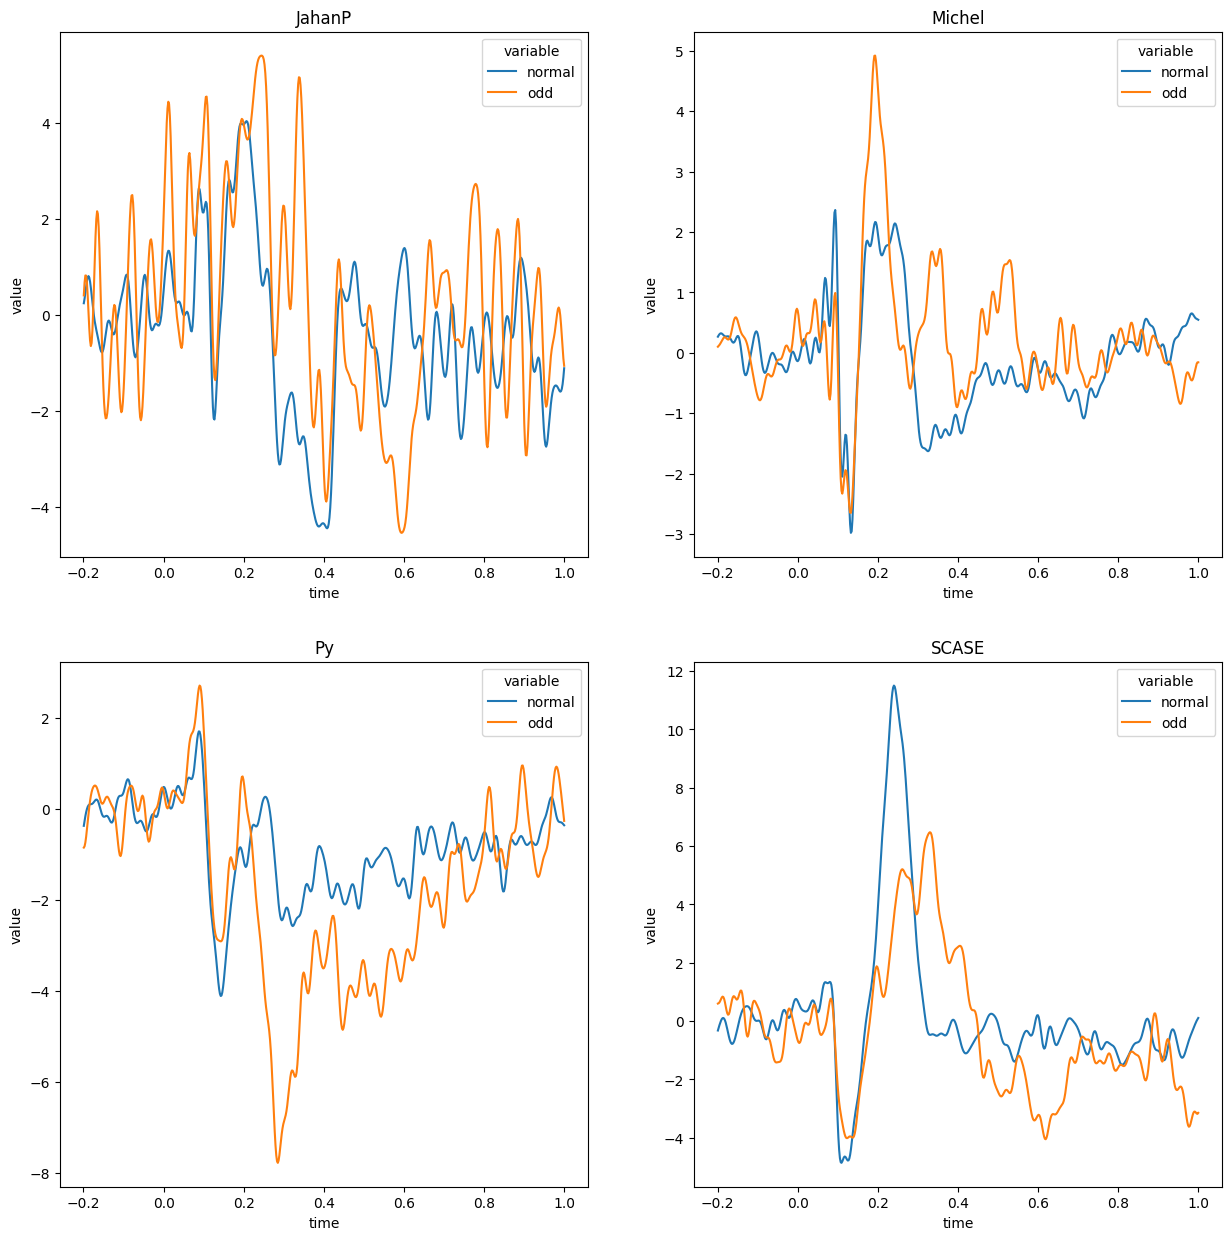

In [11]:
channel = 'FCz'
plot_df = oddball_df[oddball_df['channel']==channel]
plot_df = plot_df.drop(columns=['channel', 'contrast']).melt(id_vars = ['time', 'team_number', 'team_name'])
display(plot_df)

fig, axs = plt.subplots(2,2, figsize=(15,15))
for i, (team_name, team_df) in enumerate(plot_df.groupby(by='team_name')):
    ax = axs[int(i/2), i%2]
    sns.lineplot(data=team_df, x='time', y='value', hue='variable', ax=ax)
    ax.set_title(team_name)

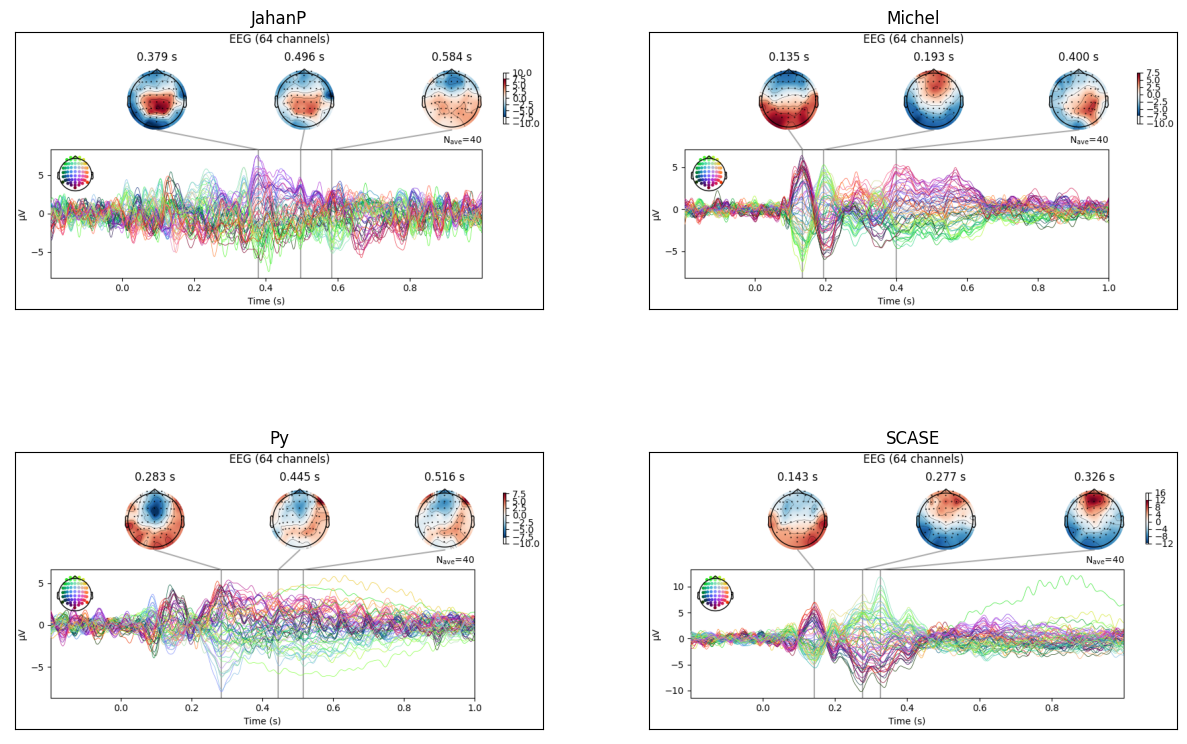

In [29]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig_dict = {fname.split('_')[-2]:fname for fname in os.listdir(result_dir) if fname.split('_')[-1]=='oddball.png'}

for i, (team_name, team_df) in enumerate(plot_df.groupby(by='team_name')):
    ax = axs[int(i/2), i%2]
    im = plt.imread(f"{result_dir}\\{fig_dict[team_name]}")
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(team_name)

plt.show()

# Calculation

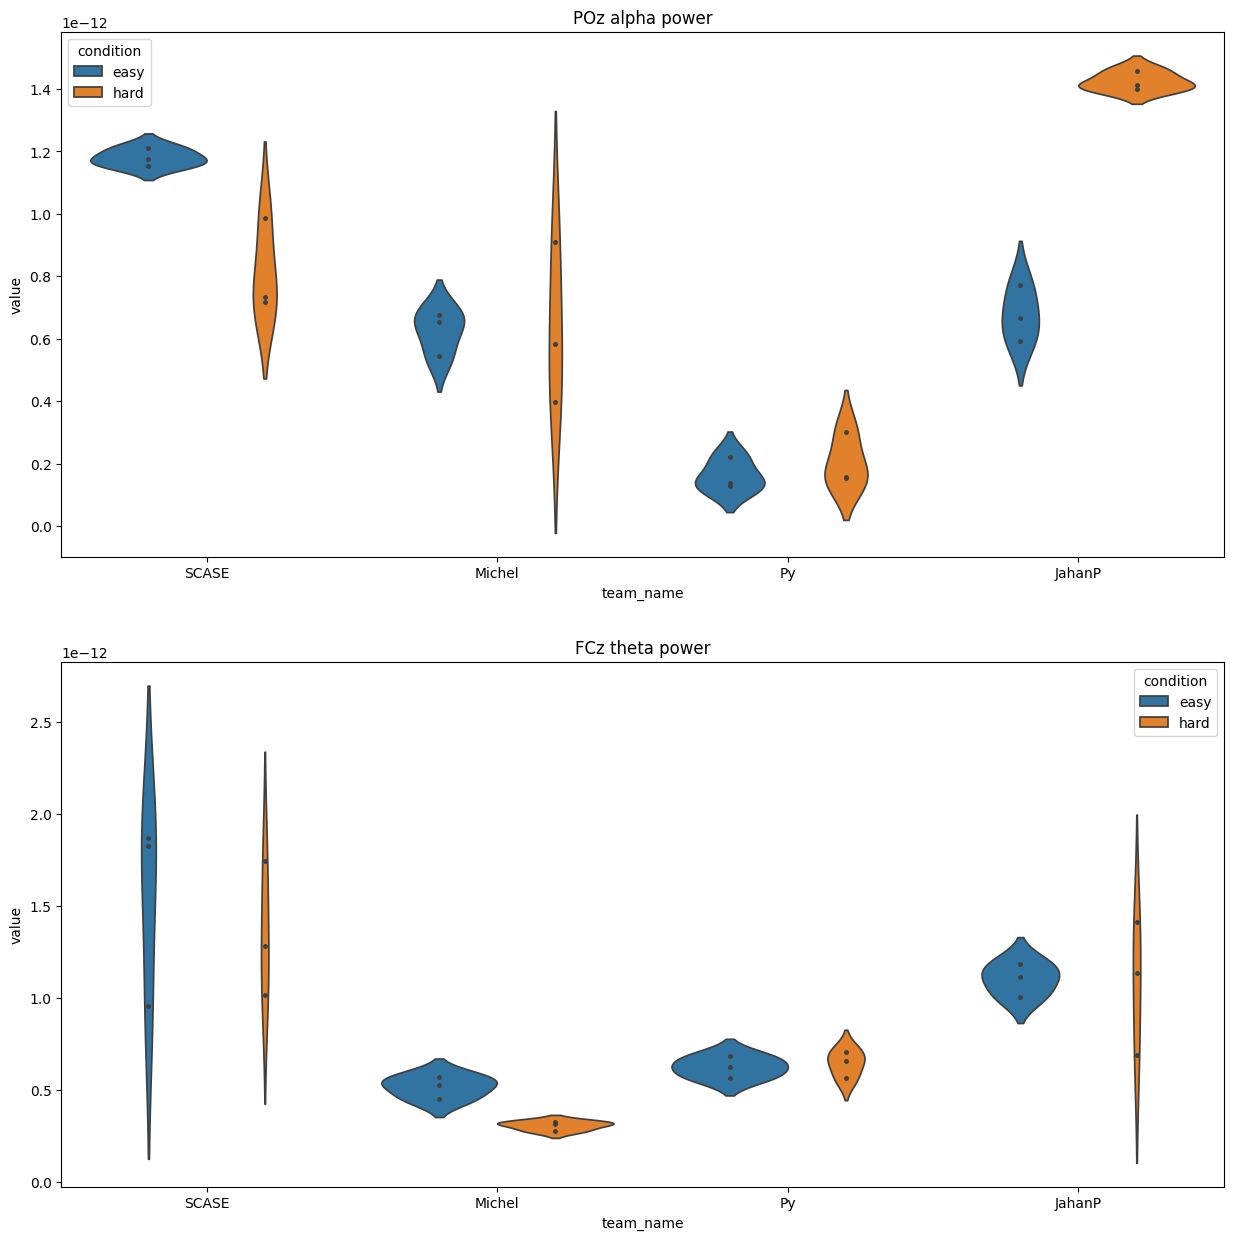

In [33]:
conditions = {
    'POz alpha power':{"channel": "POz","band": "alpha"},
    'FCz theta power':{"channel": "FCz","band": "theta"},
}

fig, axs = plt.subplots(2, figsize=(15,15))

for i, (label, params) in enumerate(conditions.items()):
    ax = axs[i]
    plot_df = calculation_df.copy()
    for column, value in params.items():
        plot_df = plot_df[plot_df[column] == value]

    sns.violinplot(data=plot_df, x='team_name', y='value', hue='condition', split=False, inner="point", ax=ax)

    ax.set_title(label)

plt.show()

In [55]:
dimensions = ['channel', 'band', 'team_number', 'team_name']
target = 'condition'
features =  dimensions+[target]
# calculation_df.pivot(columns='condition', index=['channel', 'band', 'method', 'team_number', 'team_name'], values='value')
mean_calculation_df = calculation_df.groupby(by=features)['value'].mean().reset_index()
mean_calculation_df = mean_calculation_df.pivot(index=dimensions, columns=target, values='value').reset_index()
mean_calculation_df['diff'] = mean_calculation_df['hard'] - mean_calculation_df['easy']

conditions = {
    'POz alpha power should decrease with difficulty':{"channel": "POz","band": "alpha"},
    'FCz theta power should increase with difficulty':{"channel": "FCz","band": "theta"},
}

for label, params in conditions.items():
    plot_df = mean_calculation_df
    for column, value in params.items():
        plot_df = plot_df[plot_df[column] == value]

    print(label)
    display(plot_df.sort_values(by='diff'))


POz alpha power should decrease with difficulty


condition,channel,band,team_number,team_name,easy,hard,diff
1160,POz,alpha,1,SCASE,1.180550e-12,8.130641e-13,-3.674863e-13
1161,POz,alpha,2,Michel,6.251157e-13,6.300993e-13,4.983575e-15
1162,POz,alpha,3,Py,1.622706e-13,2.048412e-13,4.257066e-14
1163,POz,alpha,4,JahanP,6.772661e-13,1.424199e-12,7.469333e-13


FCz theta power should increase with difficulty


condition,channel,band,team_number,team_name,easy,hard,diff
677,FCz,theta,2,Michel,5.161366e-13,3.053663e-13,-2.107703e-13
676,FCz,theta,1,SCASE,1.549130e-12,1.347841e-12,-2.012896e-13
679,FCz,theta,4,JahanP,1.101388e-12,1.076972e-12,-2.441556e-14
678,FCz,theta,3,Py,6.229339e-13,6.423505e-13,1.941655e-14
